In [1]:
import os, sys
module_rootdir = '../..'
dataset_rootdir = '../../..'
label_rootdir = module_rootdir
weight_rootdir = module_rootdir
sys.path.append(module_rootdir)

from modules.first_stage.set_parameters_for_inference import set_param_for_inference
from modules.plot.plot_dataanalysis import plot_intervals_roc2
from modules.evaluation.nms_tuning import ROC_for_nms_tuning

In [2]:
weights_file = 'model_weights/1705990924432/anchor_free_detector.pt'

param_dict = set_param_for_inference(
    dataset_type = 'bdd',
    module_rootdir = module_rootdir,
    dataset_rootdir = dataset_rootdir,
    label_rootdir = label_rootdir,
    batch_size = 1,
    trained_weights_file = os.path.join(weight_rootdir, weights_file))

device = param_dict['device']
dataset_param = param_dict['dataset_param']
dataset_train = param_dict['dataset_train']
dataset_val = param_dict['dataset_val'] 
detector = param_dict['detector']

GPU is available. Good to go!
printing model config parameters
----------------------------------------------------------------------------------------------------
backbone                        : efficientnet_b4
num_backbone_nodes              : 4
num_extra_blocks                : 1
num_levels                      : 5
extra_blocks_feat_dim           : 512
num_fpn_blocks                  : 2
fpn_feat_dim                    : 128
prediction head stem_channels   : [128, 128, 128, 128]
activation                      : swish
image dimension BDD (H, W, D)   : (360, 640, 3)
image dimension KITTI (H, W, D) : (263, 873, 3)
num_classes                     : 2
DEVICE                          : cuda
****************************************************************************************************
 
Load JSON file .. please wait
annotations from 69863/69863 aggregated : Aggregation COMPLETE
Load JSON file .. please wait
annotations from 10000/10000 aggregated : Aggregation COMPLETE


In [3]:
dataset = dataset_train
gt_iou_thresh = 0.1
num_images = 200 # 6000
image_start_idx = 0

NMS_THRESH, \
DETECTION_RATE_LIST, \
FP_RATE_PER_IMAGE_LIST \
    = ROC_for_nms_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        device = device)

generating detection rate & FP_per_image for nms score:  0.1
generating detection rate & FP_per_image for nms score:  0.2
generating detection rate & FP_per_image for nms score:  0.3
generating detection rate & FP_per_image for nms score:  0.4
generating detection rate & FP_per_image for nms score:  0.5
generating detection rate & FP_per_image for nms score:  0.6
generating detection rate & FP_per_image for nms score:  0.7
generating detection rate & FP_per_image for nms score:  0.8
generating detection rate & FP_per_image for nms score:  0.9
generating detection rate & FP_per_image for nms score:  0.99


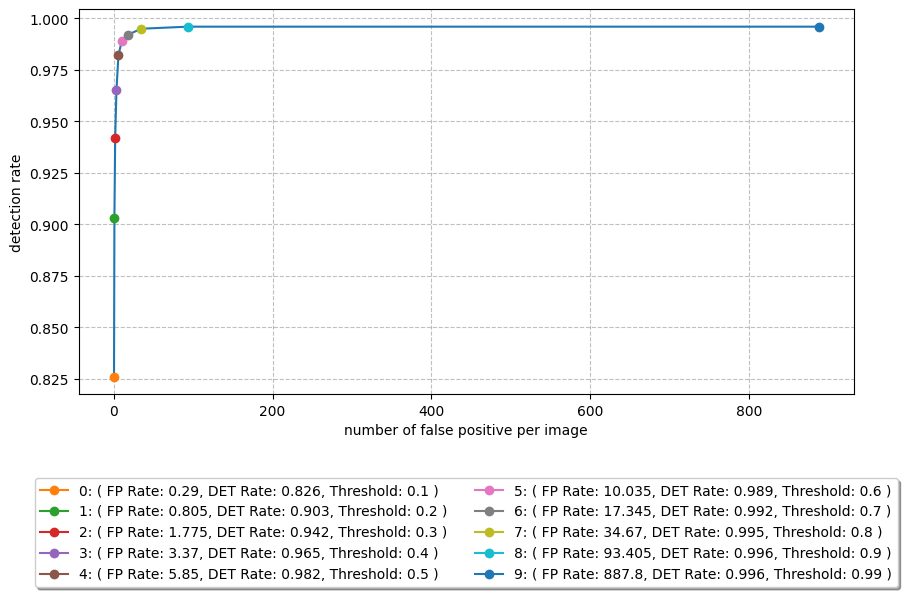

In [4]:
plot_intervals_roc2(NMS_THRESH, FP_RATE_PER_IMAGE_LIST, DETECTION_RATE_LIST, figsize=(10, 5))

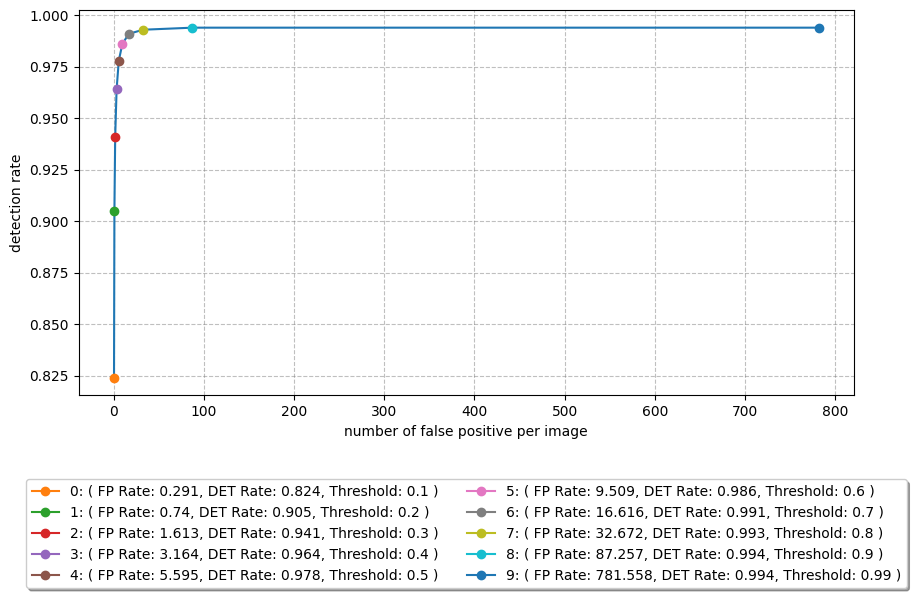

In [6]:
# 0.0 gt and prediction iou
plot_intervals_roc2(NMS_THRESH, FP_RATE_PER_IMAGE_LIST, DETECTION_RATE_LIST, figsize=(10, 5))